In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="3tlvefgVdN8H498UwE8s")
project = rf.workspace("objectdetection-dxeuw").project("face-detection-z1x9s")
version = project.version(1)
dataset = version.download("yolov11")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 2.9 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to face-detection-1 in yolov11:: 100%|██████████| 10111/10111 [00:03<00:00, 3280.36it/s]


In [2]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.25 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/112.6 GB disk)


In [4]:
!yolo task= detect mode= train data=/content/face-detection-1/data.yaml model=yolo11m.pt epochs=25 imgsz=640 batch=16

Ultralytics 8.3.25 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=/content/face-detection-1/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, 

In [5]:
from IPython.display import Image, display

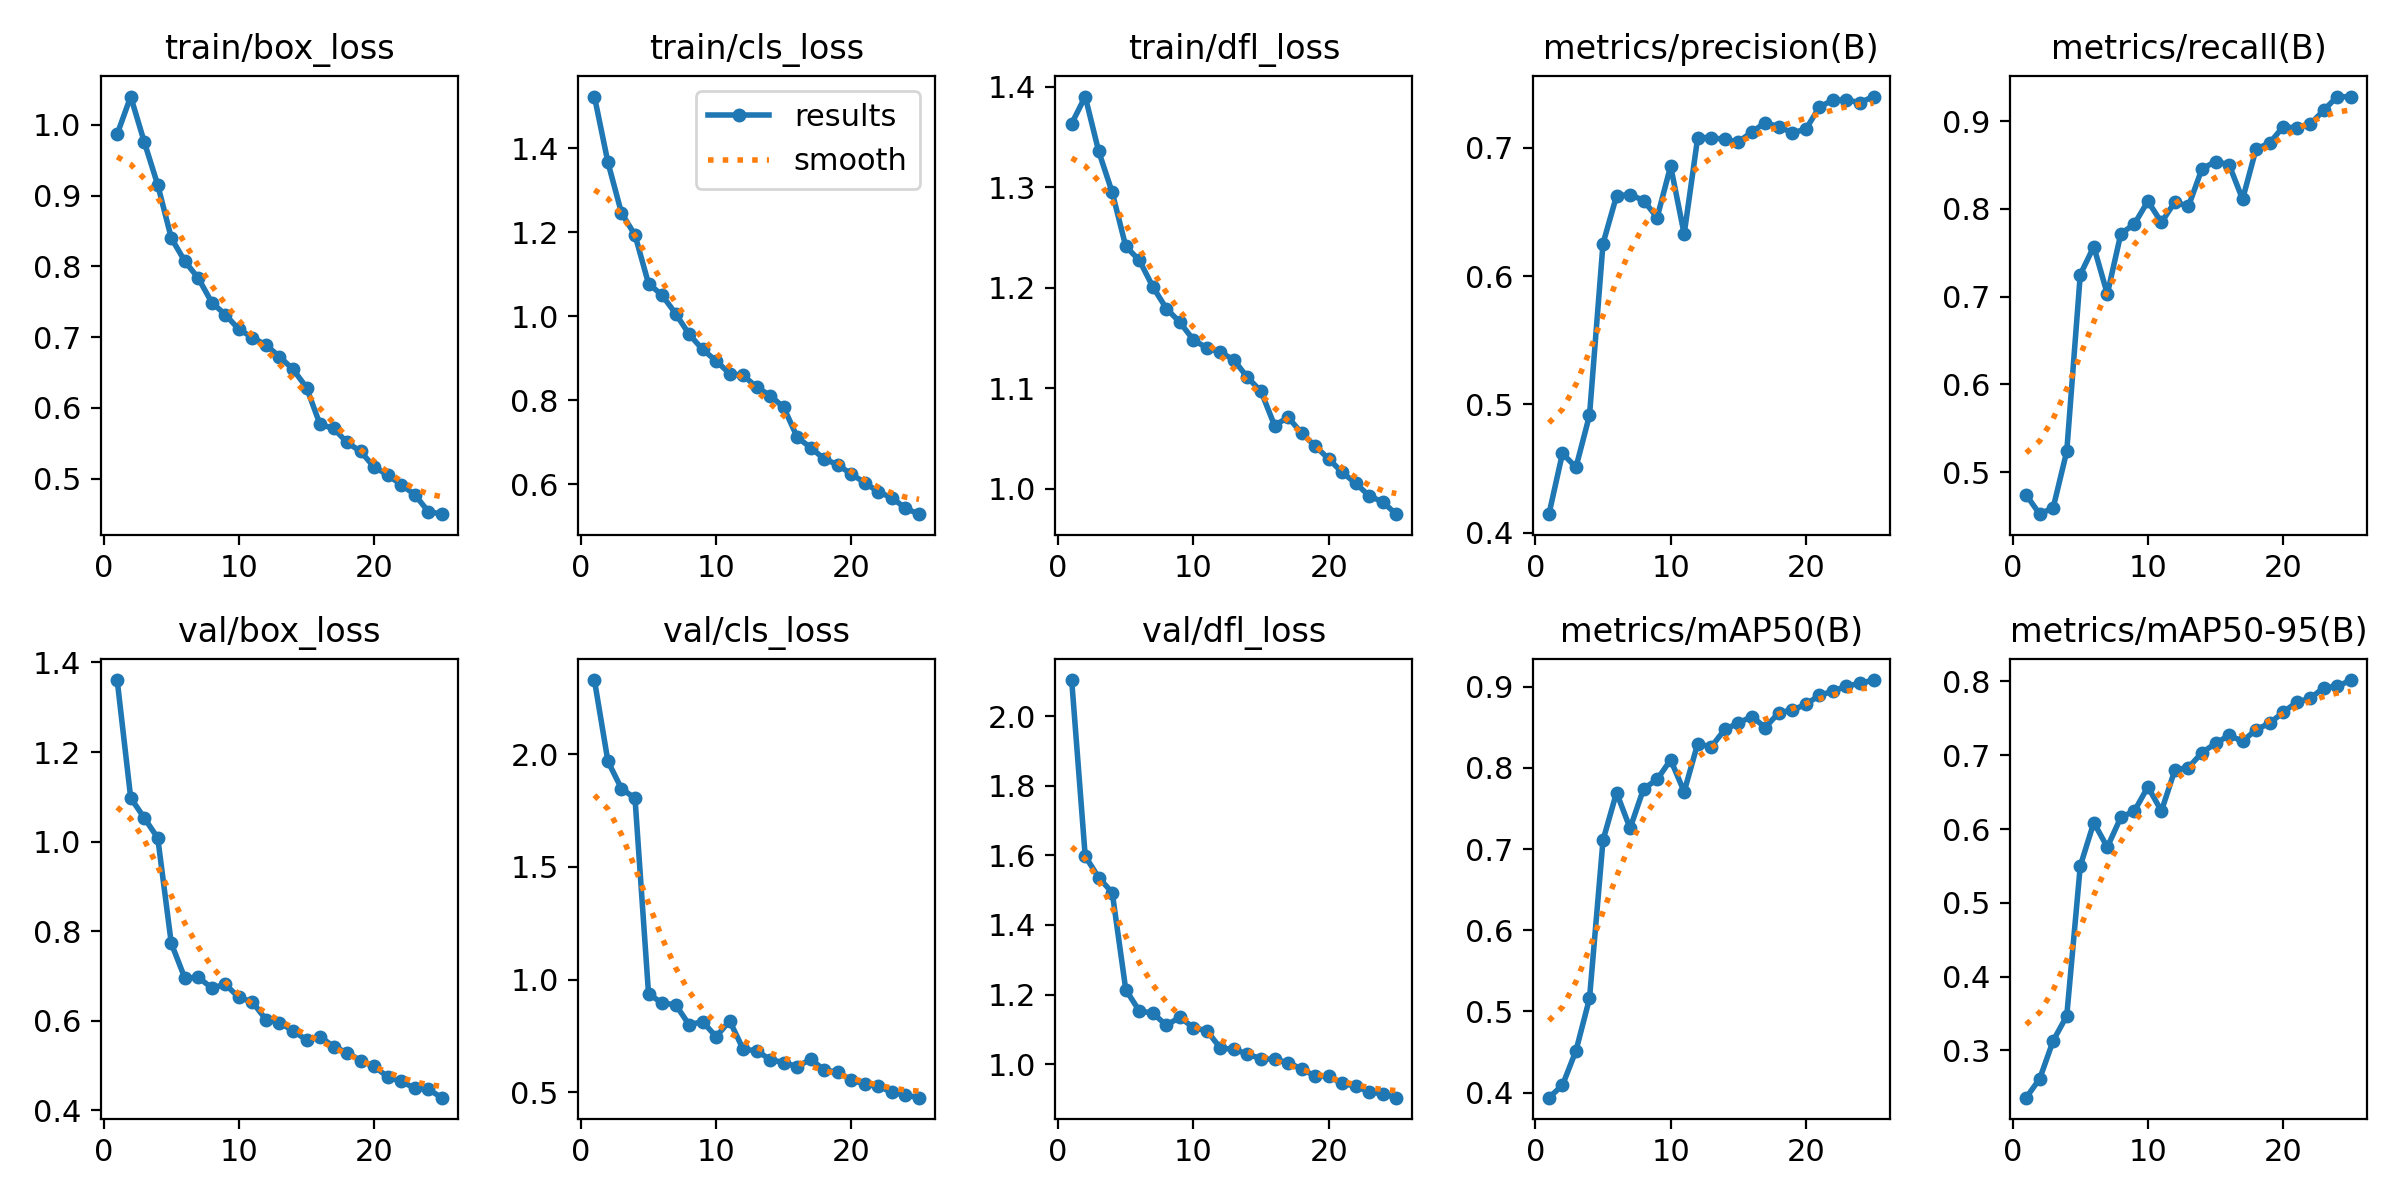

In [8]:
display(Image(filename=f"/content/runs/detect/train2/results.png", width=1000))

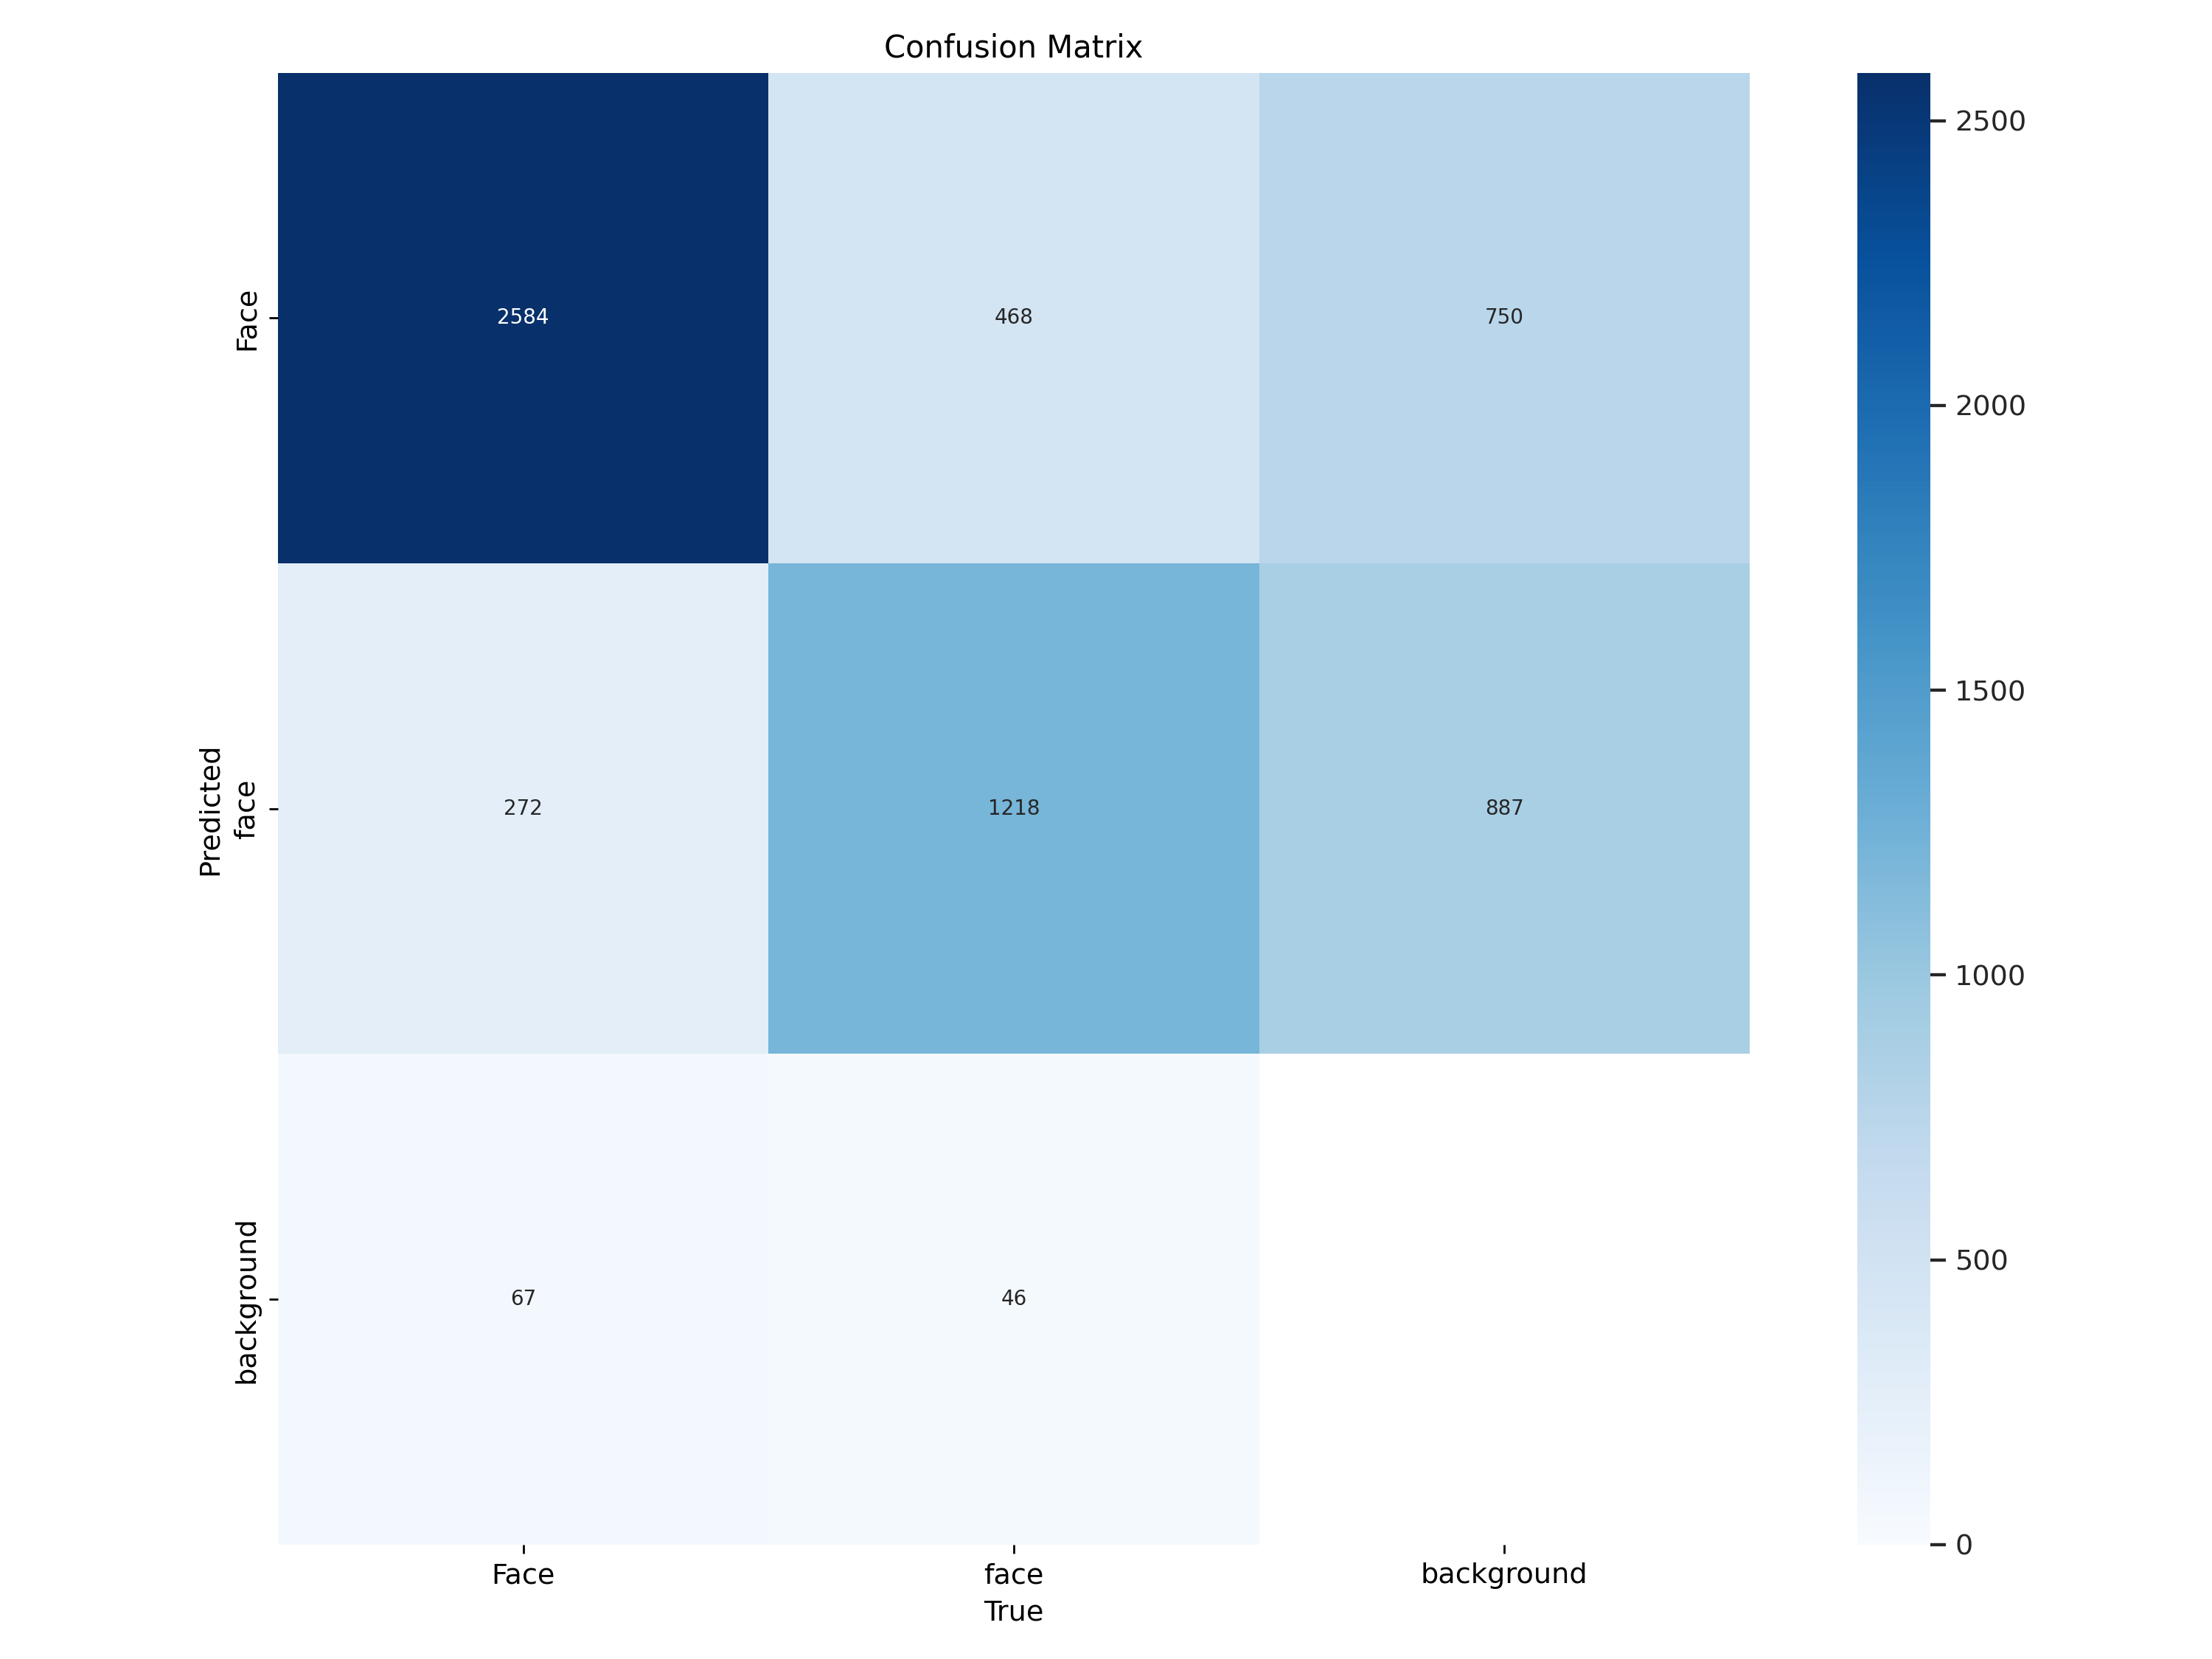

In [9]:
display(Image(filename=f"/content/runs/detect/train2/confusion_matrix.png", width=1000))

In [15]:
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt imgsz=640 conf=0.5 \
source=/content/face-detection-1/test/images

Ultralytics 8.3.25 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11m summary (fused): 303 layers, 20,031,574 parameters, 0 gradients, 67.7 GFLOPs

image 1/1513 /content/face-detection-1/test/images/0_10725_jpg.rf.2211d1905defbdf8df9fe13f2191bc86.jpg: 640x640 4 Faces, 36.8ms
image 2/1513 /content/face-detection-1/test/images/0_10725_jpg.rf.a2a7ce9d20e47c441ed87e73b35741a4.jpg: 640x640 4 Faces, 36.8ms
image 3/1513 /content/face-detection-1/test/images/101_jpg.rf.13a210b8f1b51dc497bb936285ae72b4.jpg: 640x640 1 Face, 36.8ms
image 4/1513 /content/face-detection-1/test/images/101_jpg.rf.4b93ceef452f206105e769dd650cd6b9.jpg: 640x640 1 Face, 36.8ms
image 5/1513 /content/face-detection-1/test/images/101_jpg.rf.4f1bac551eface241ef0d8b8de2c84b9.jpg: 640x640 1 face, 30.4ms
image 6/1513 /content/face-detection-1/test/images/101_jpg.rf.cb35b5f23de677941f6acb4b329836ab.jpg: 640x640 1 face, 25.8ms
image 7/1513 /content/face-detection-1/test/images/104_jpg.rf.635ee4af4a13a402cbd955

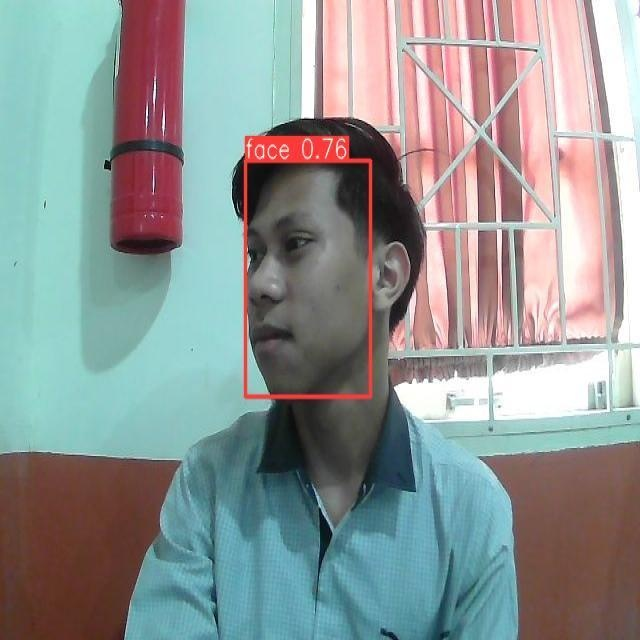

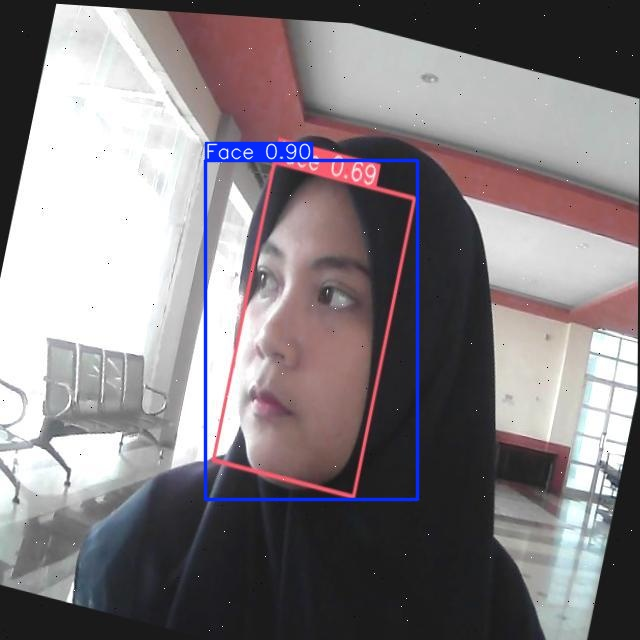

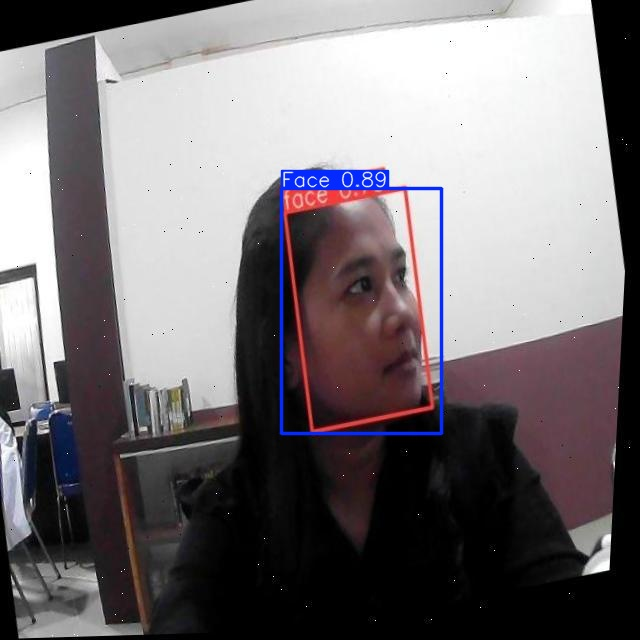

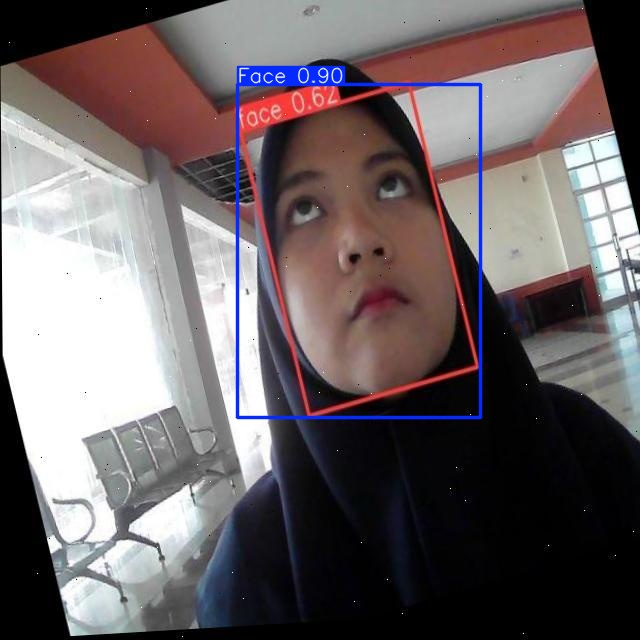

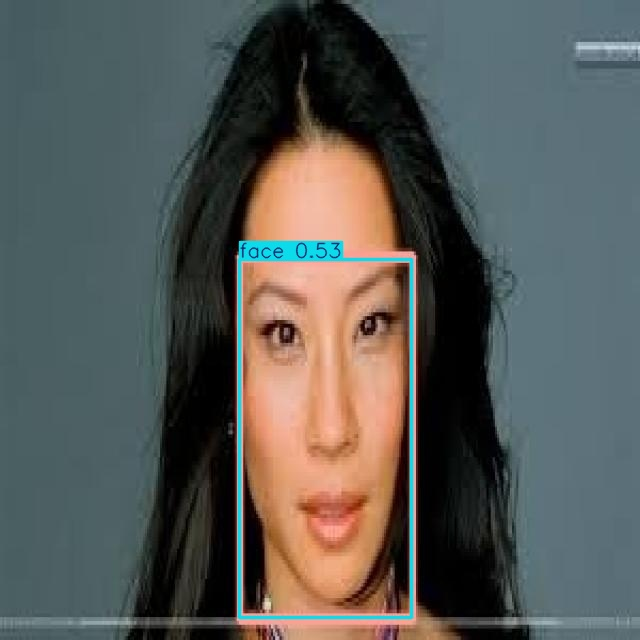

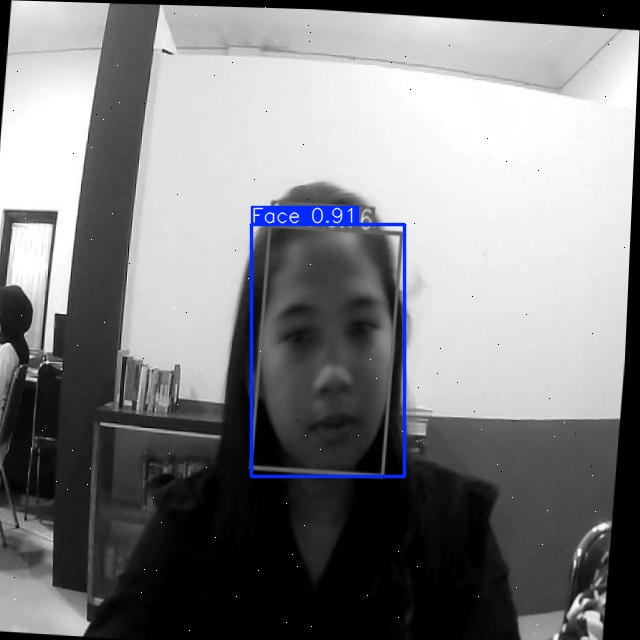

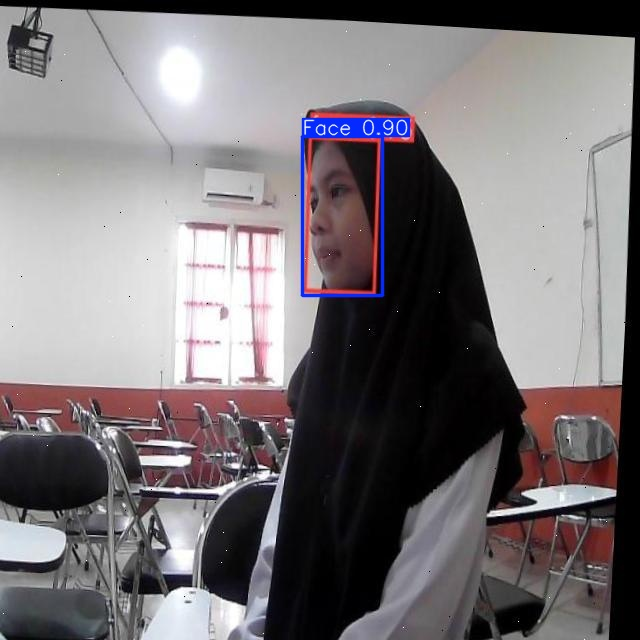

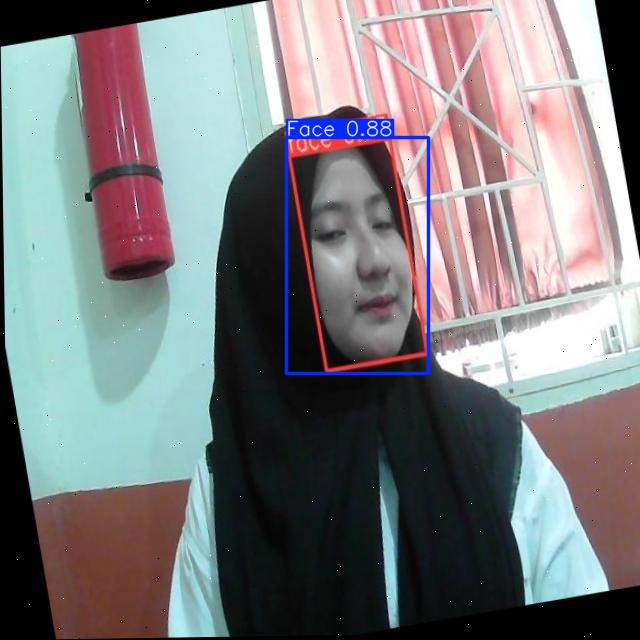

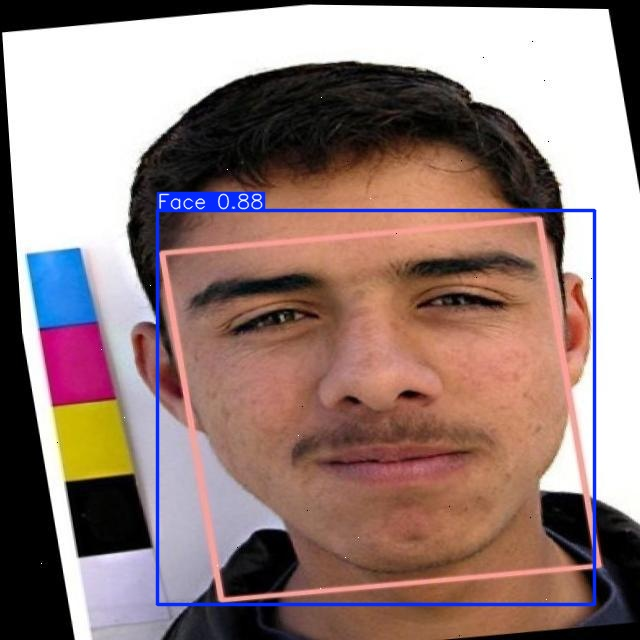

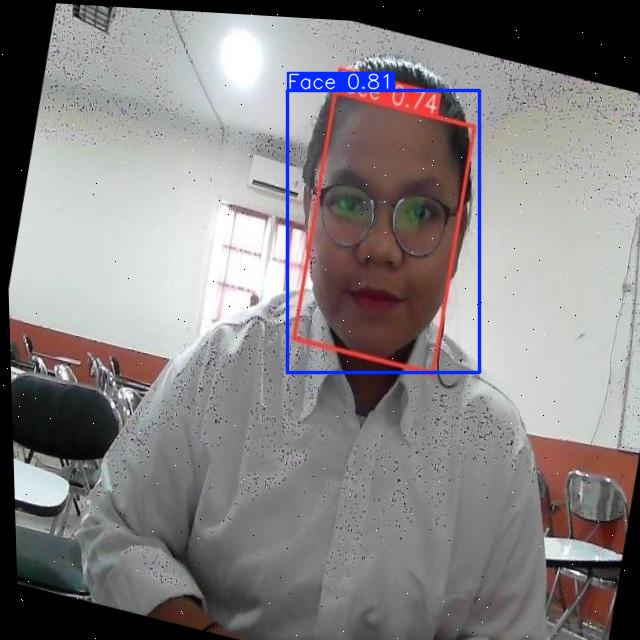

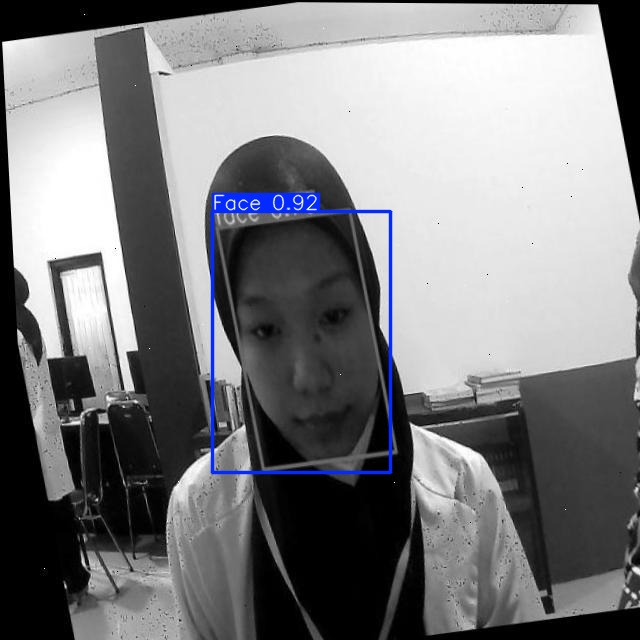

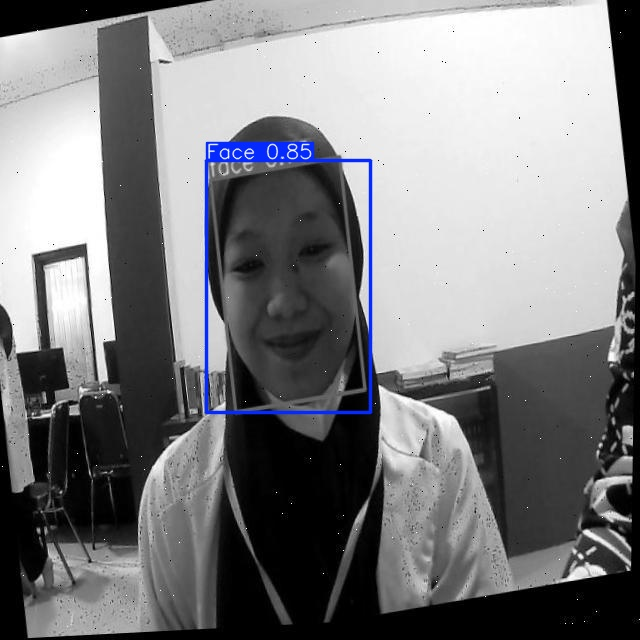

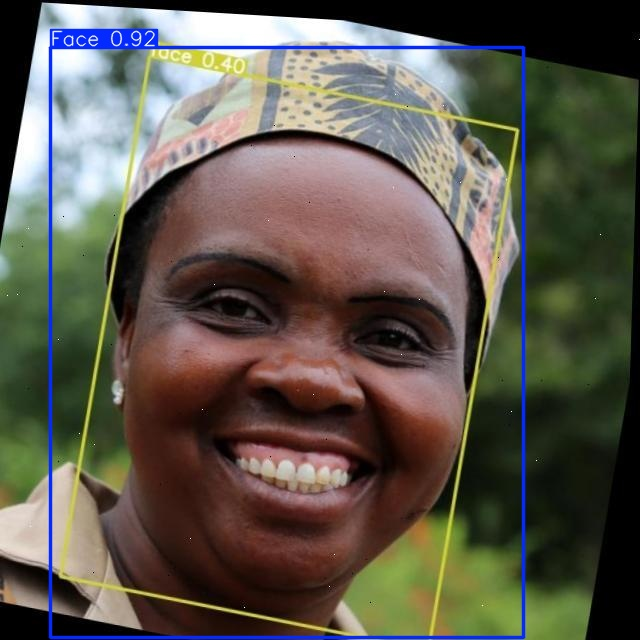

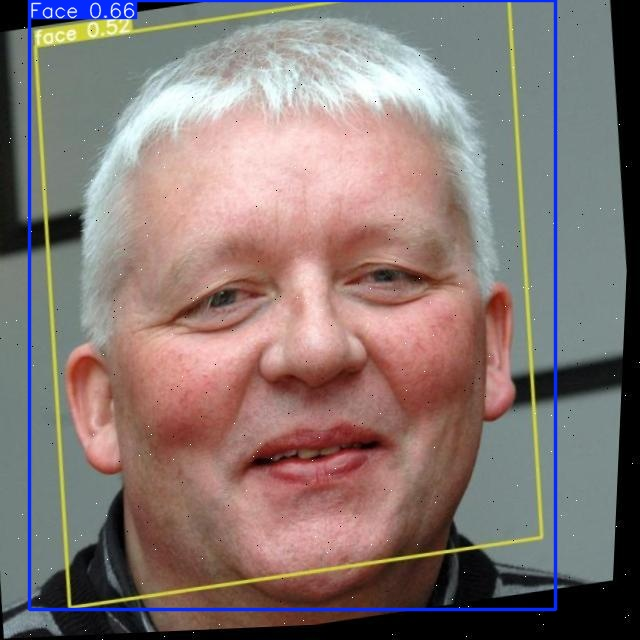

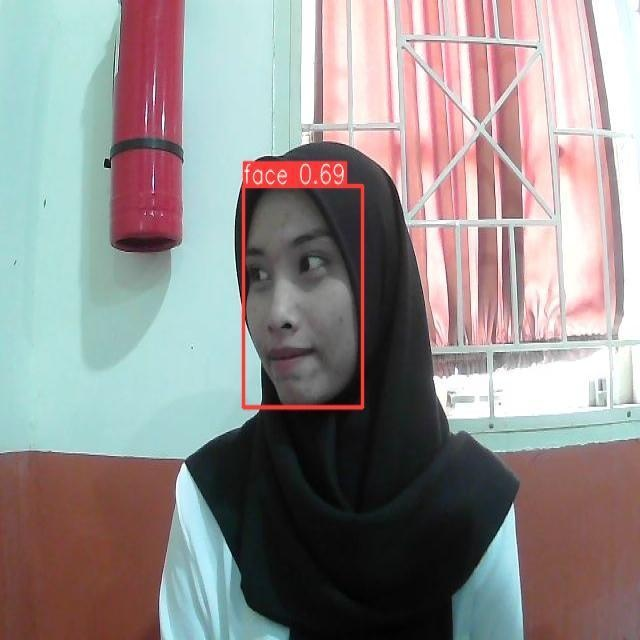

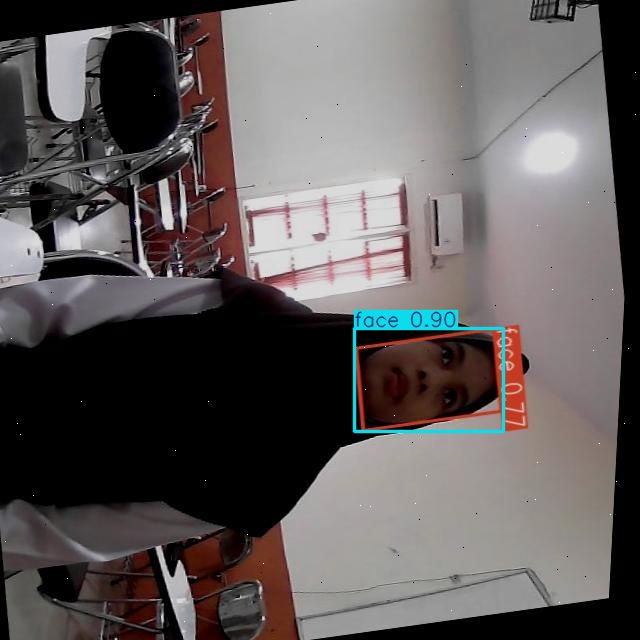

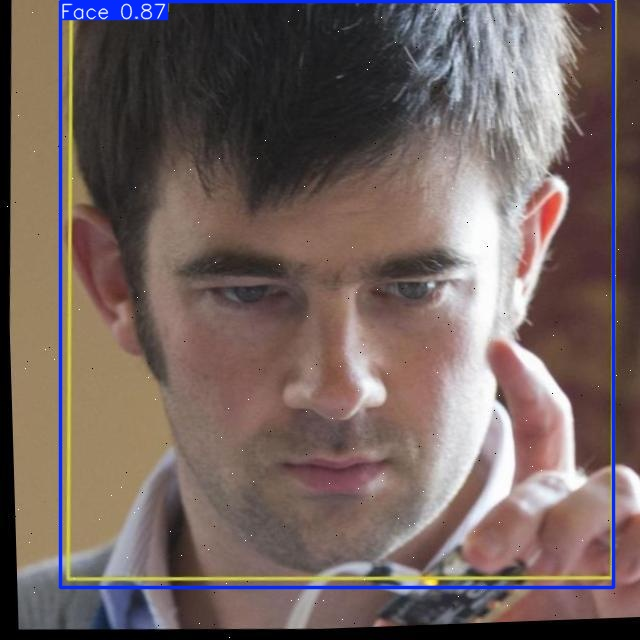

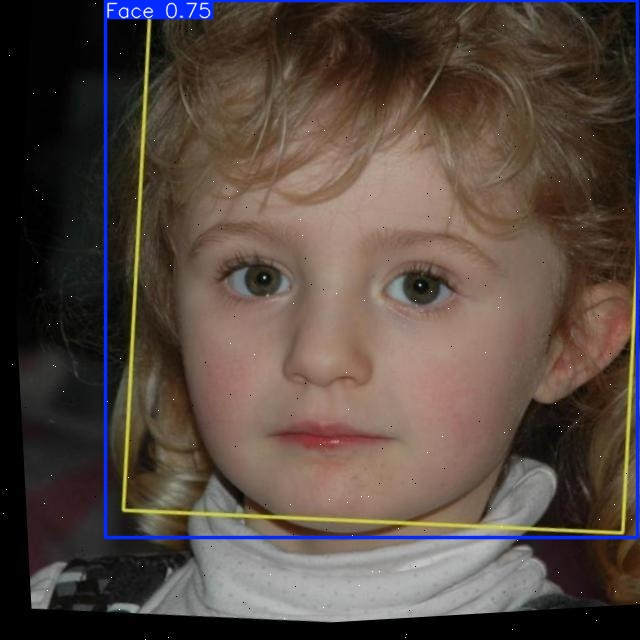

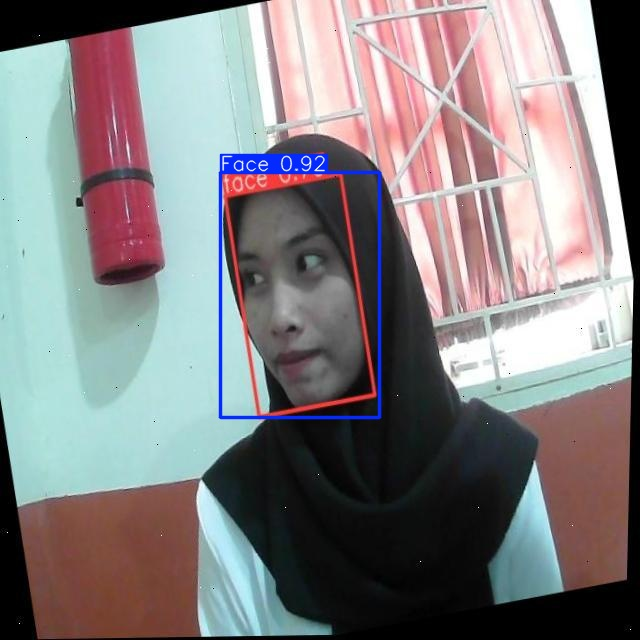

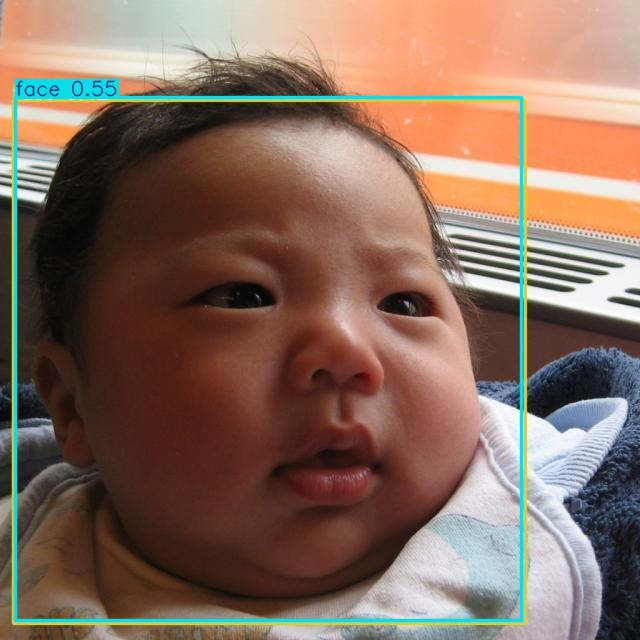

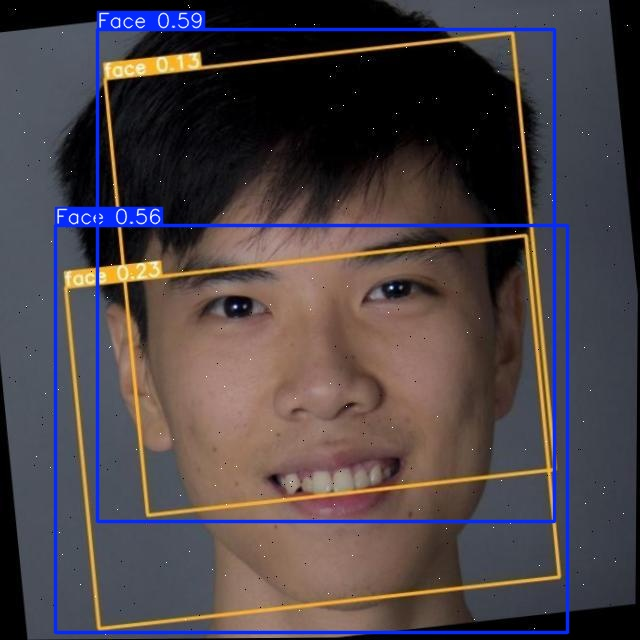

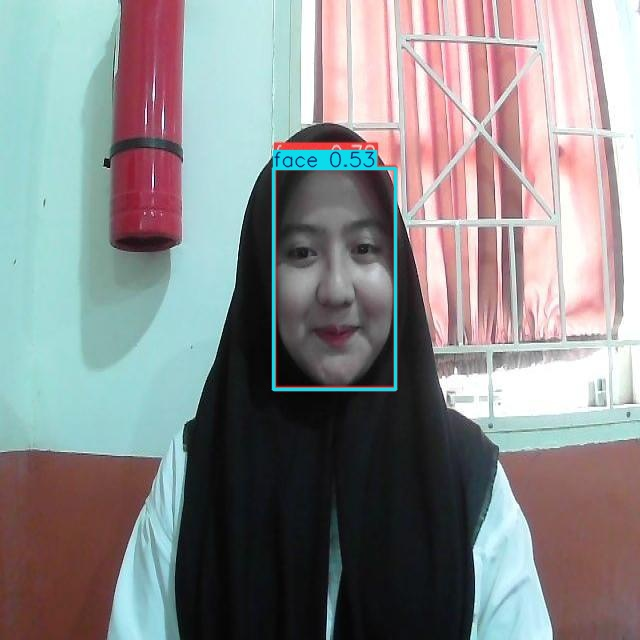

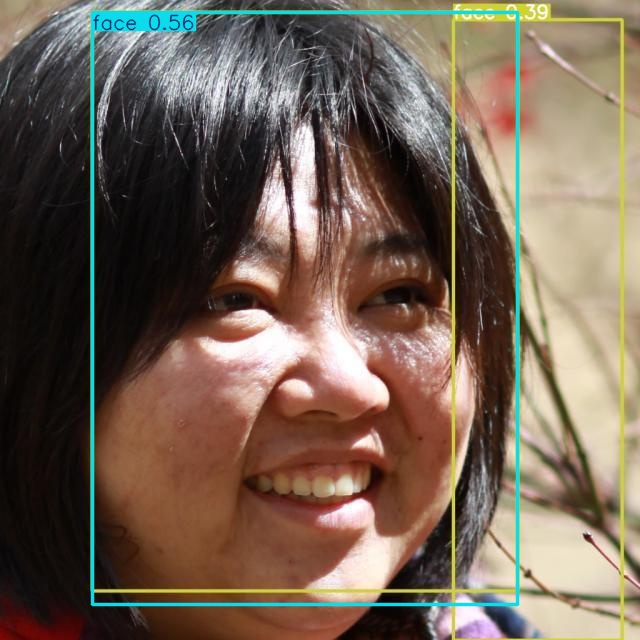

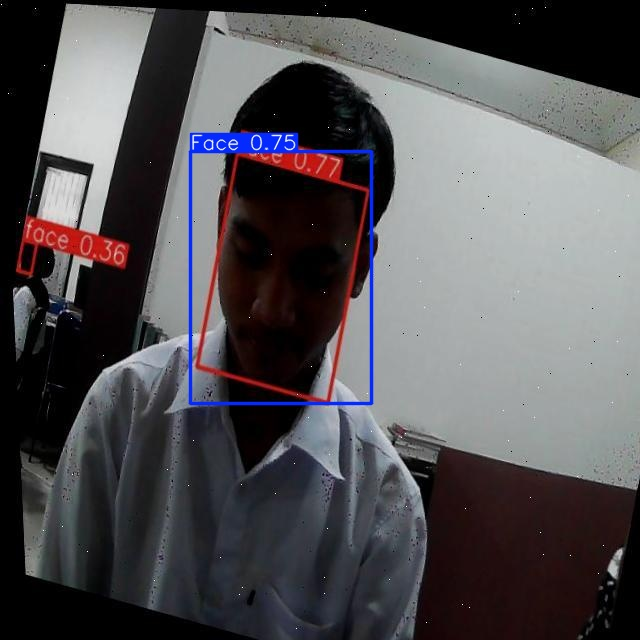

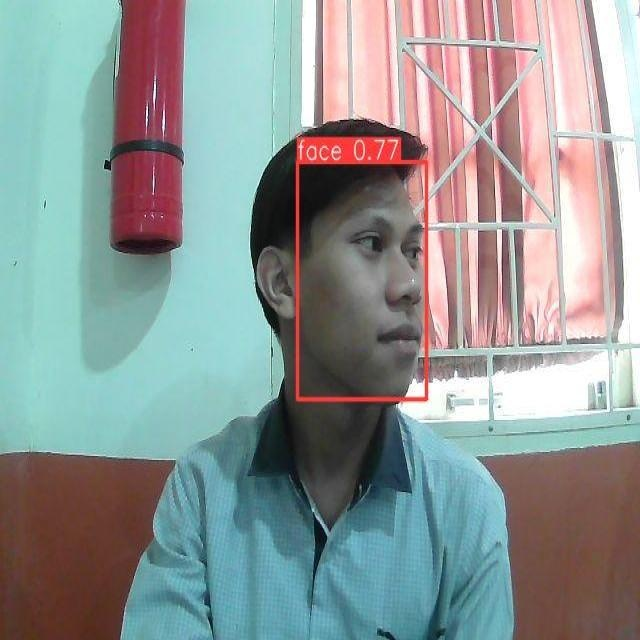

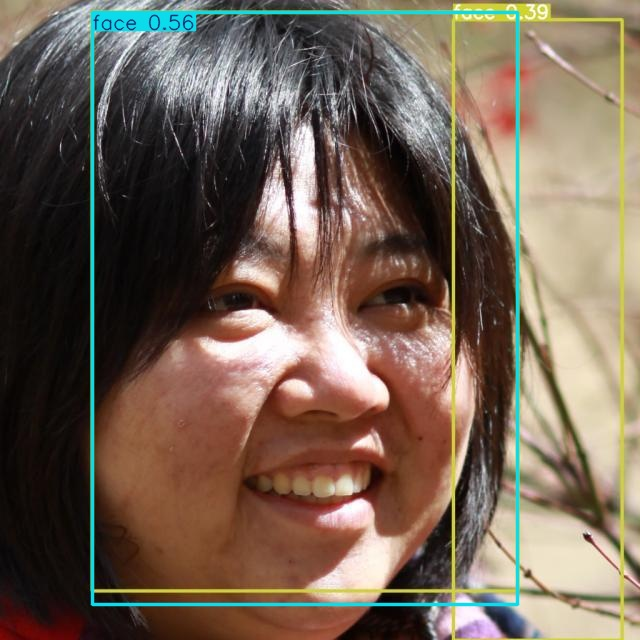

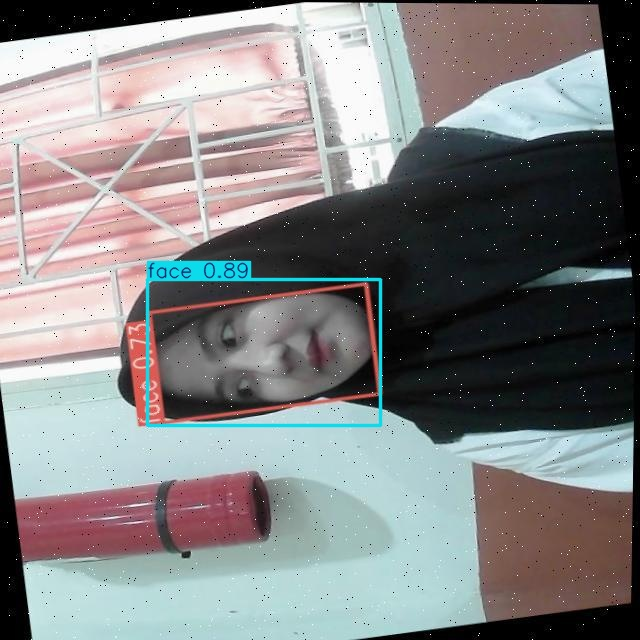

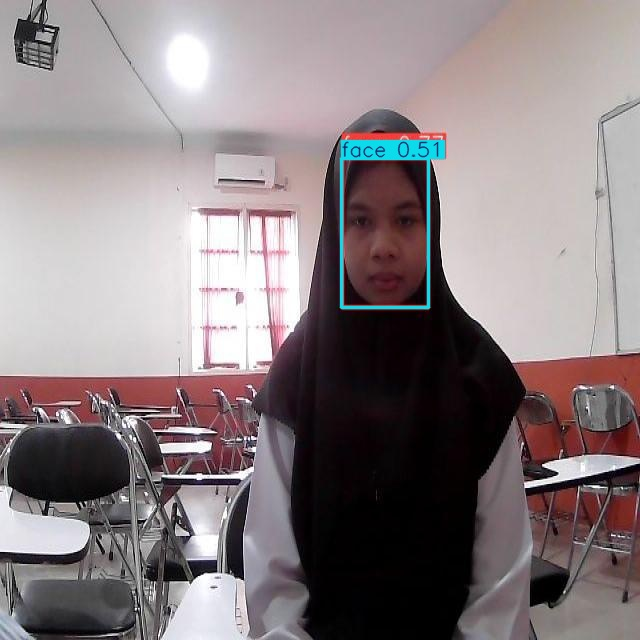

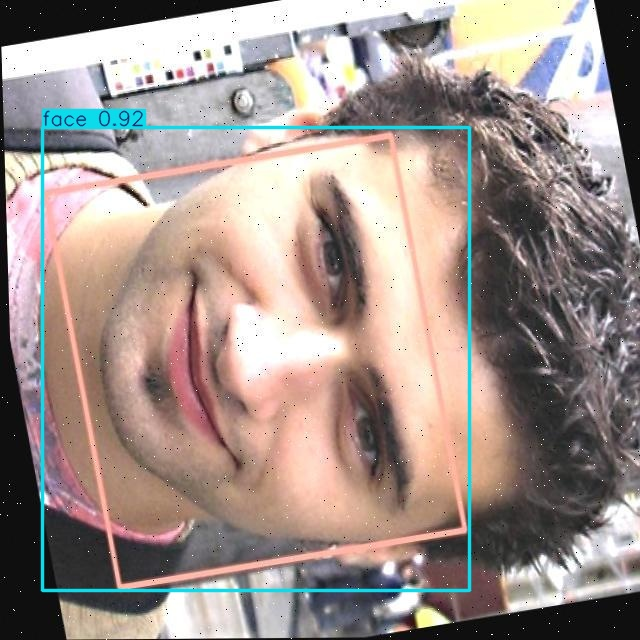

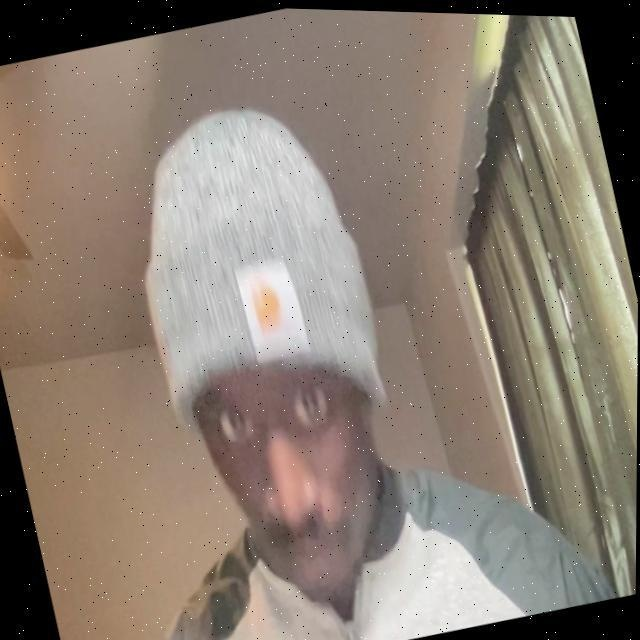

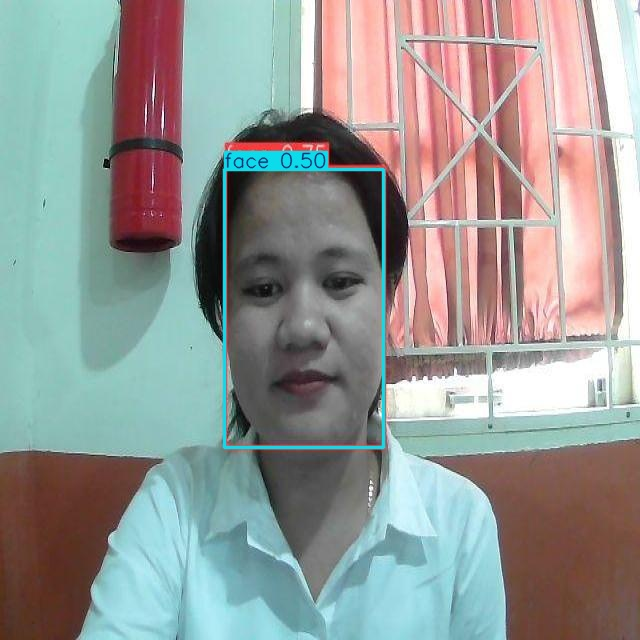

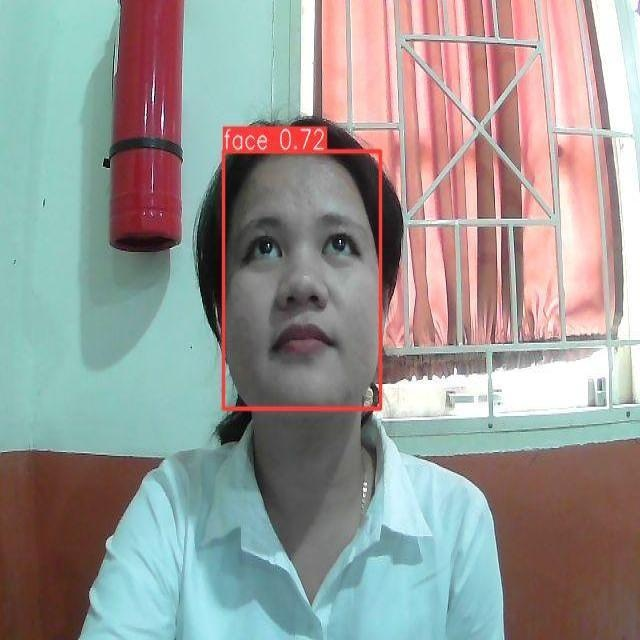

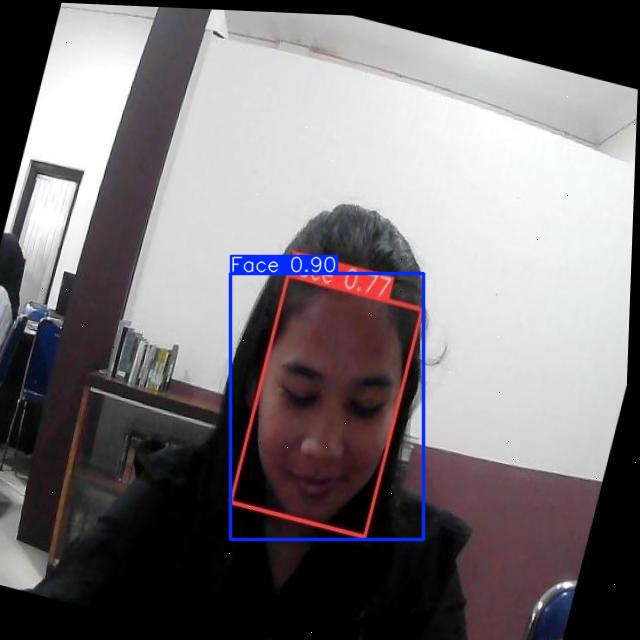

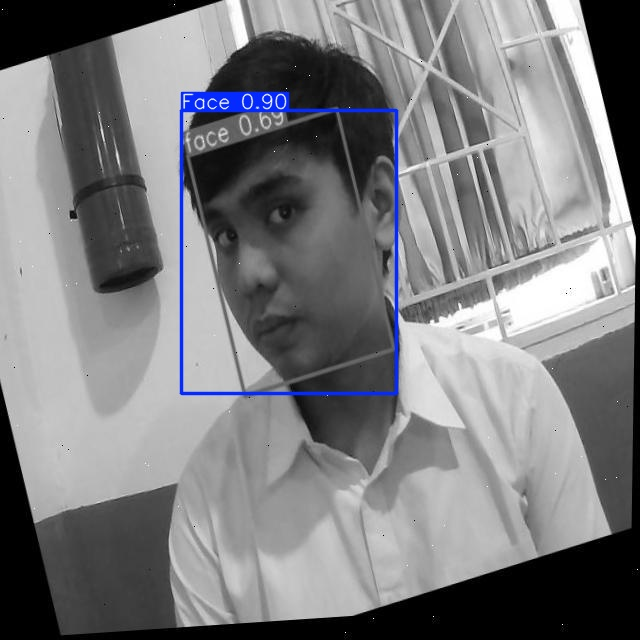

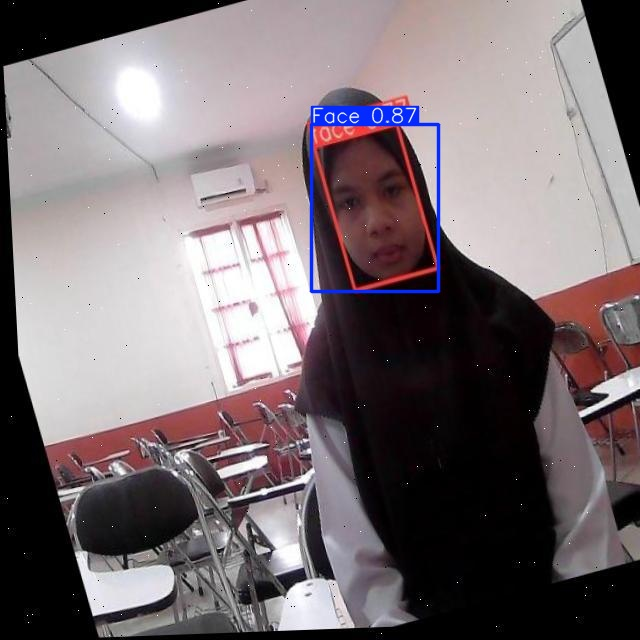

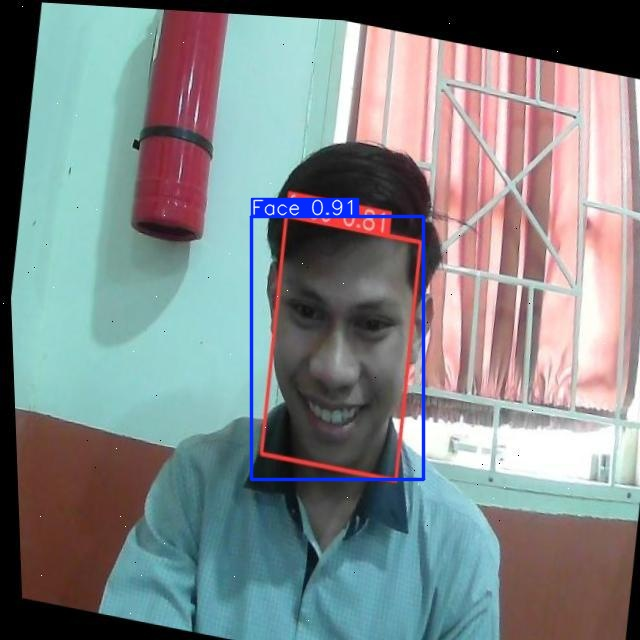

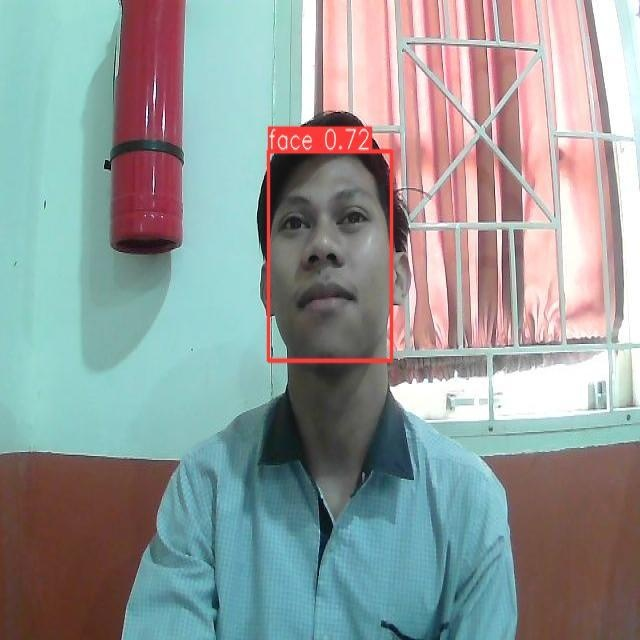

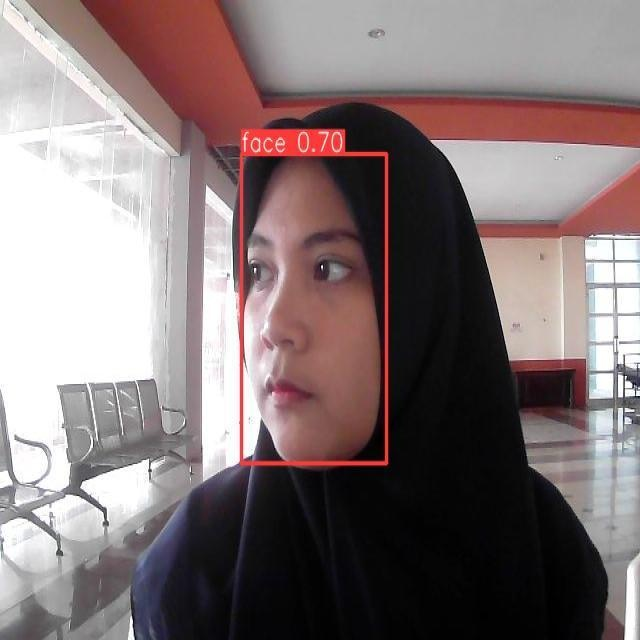

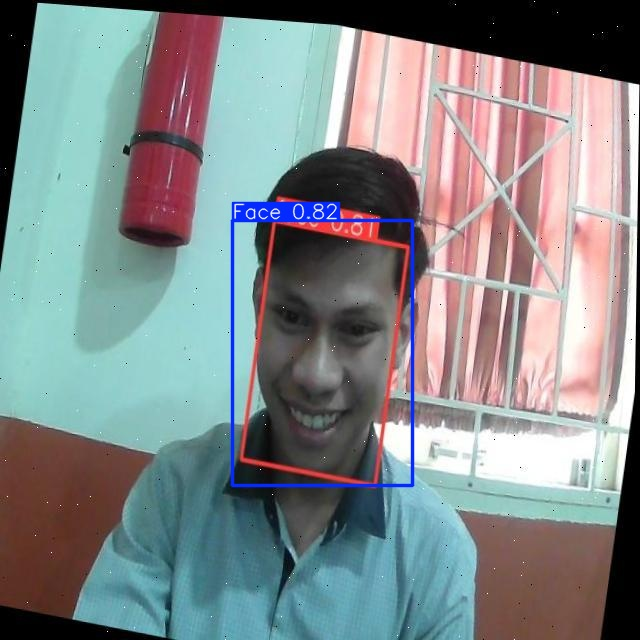

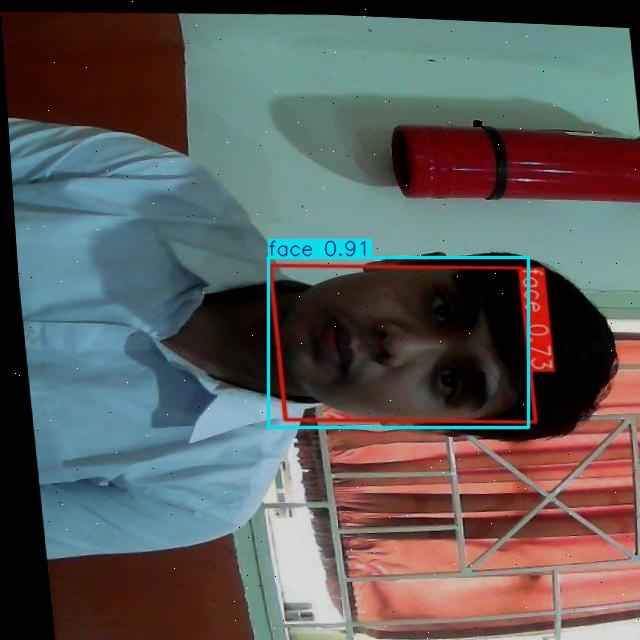

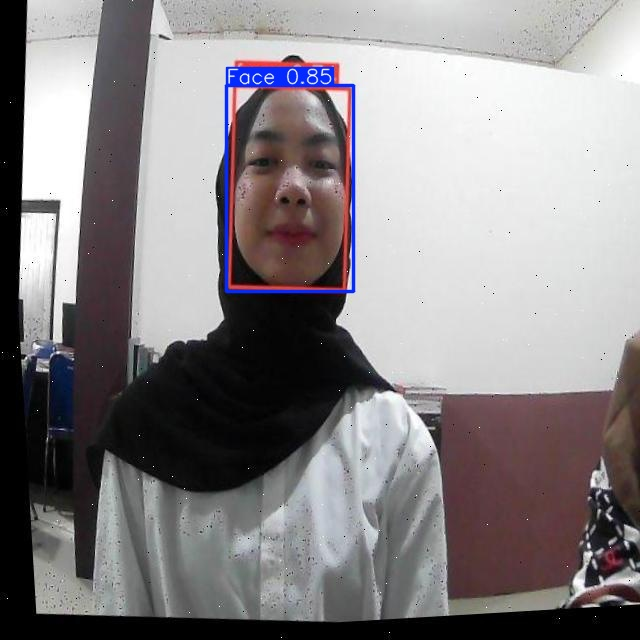

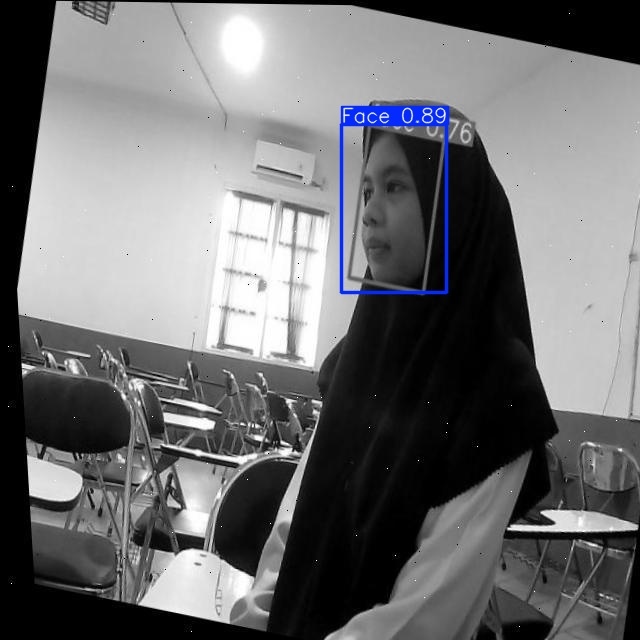

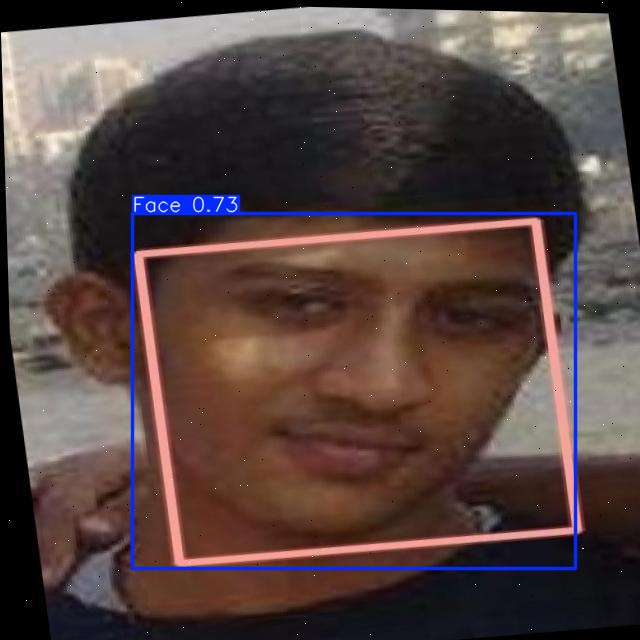

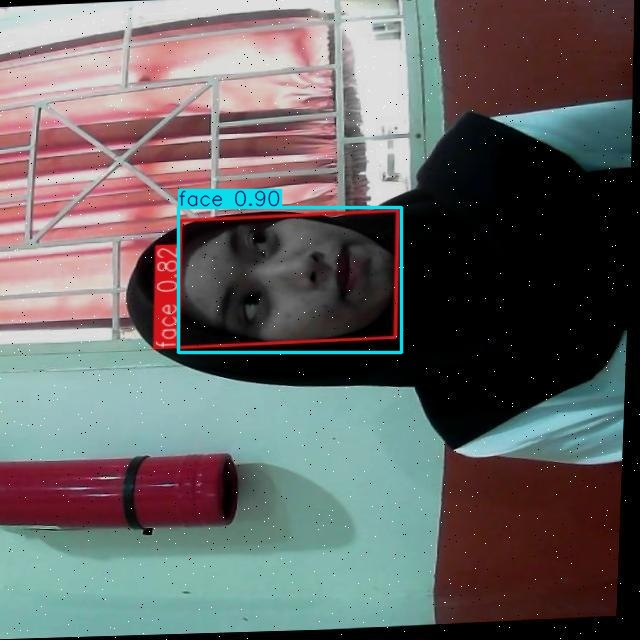

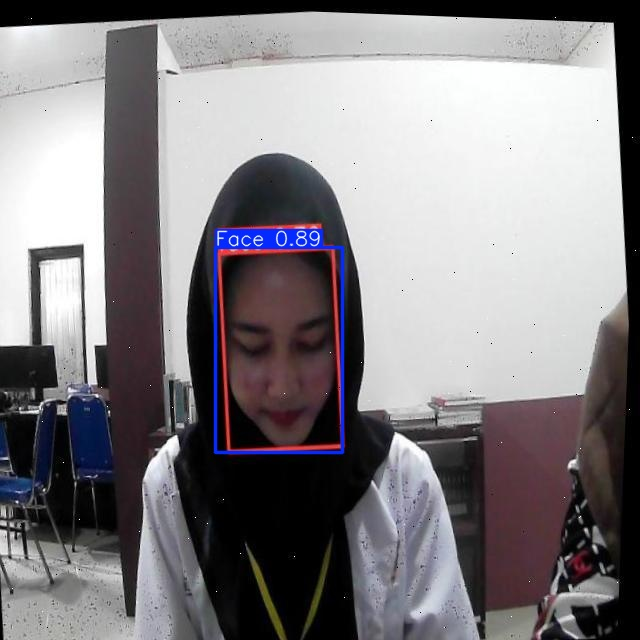

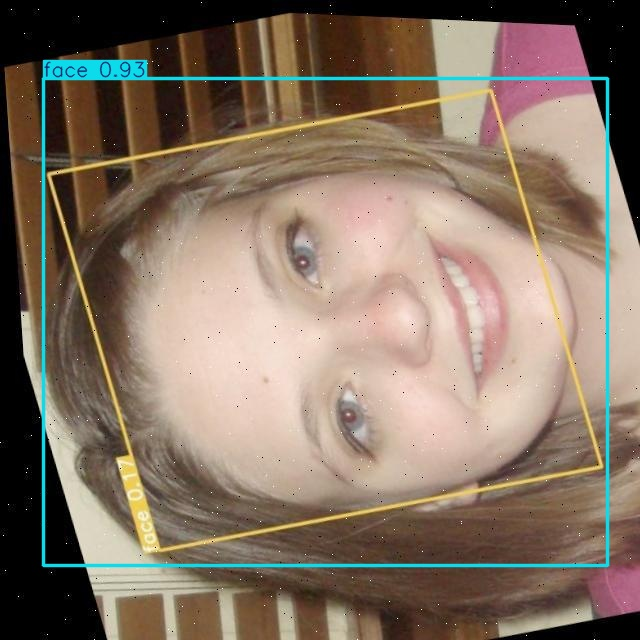

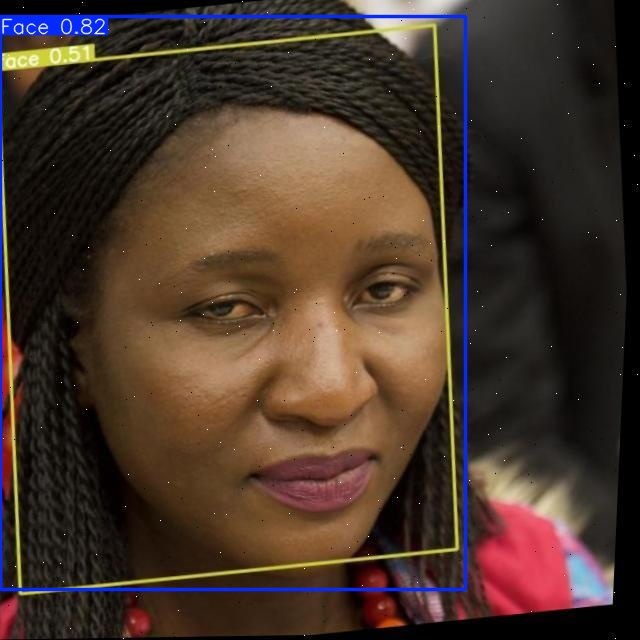

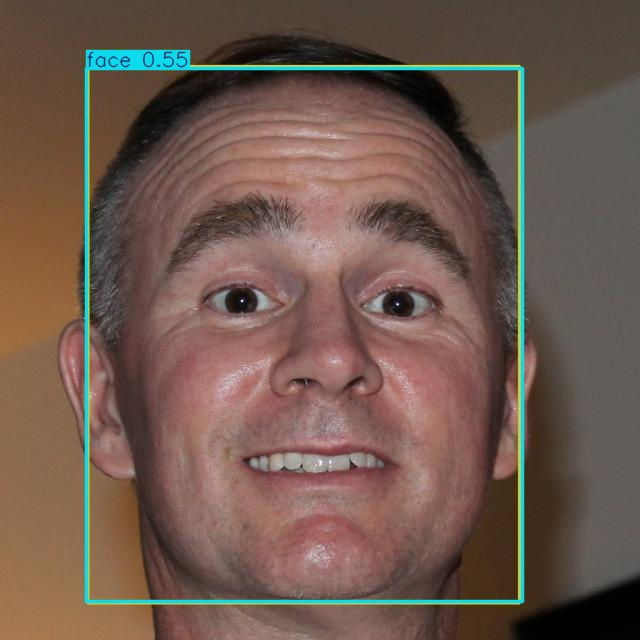

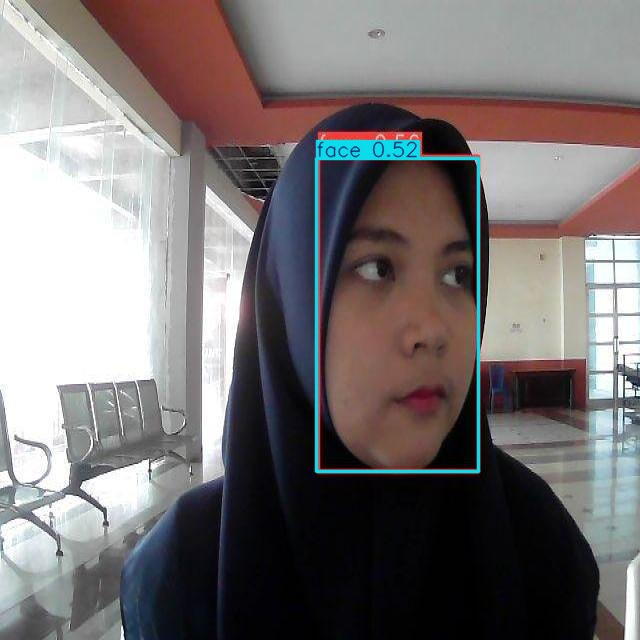

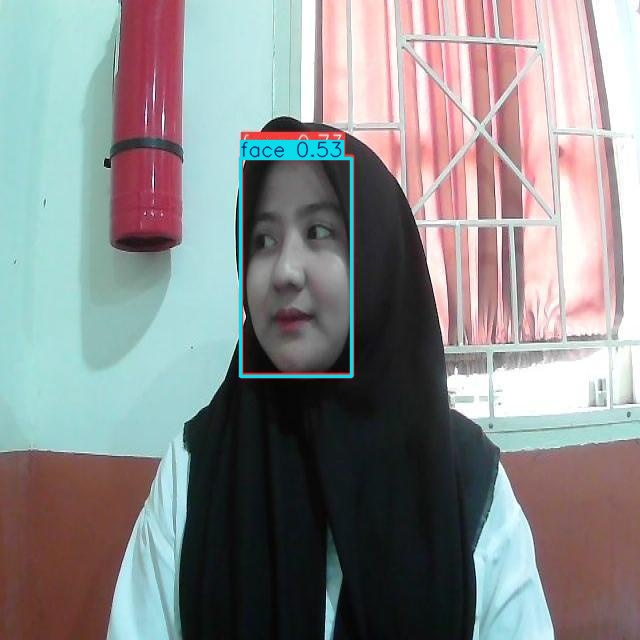

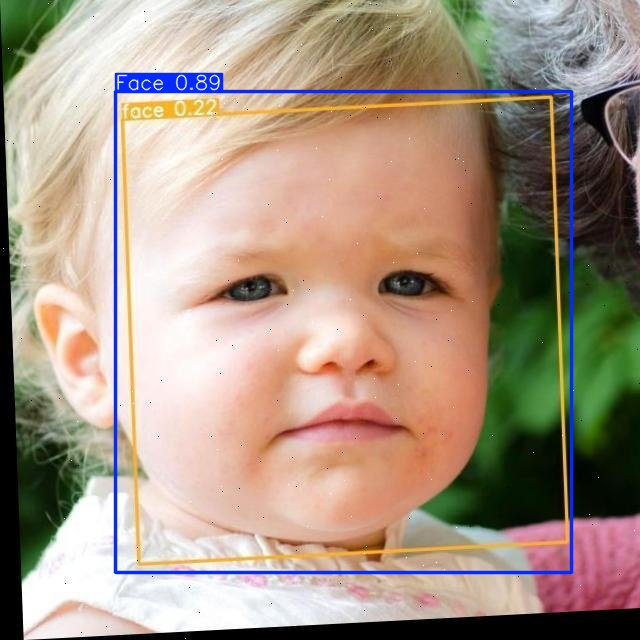

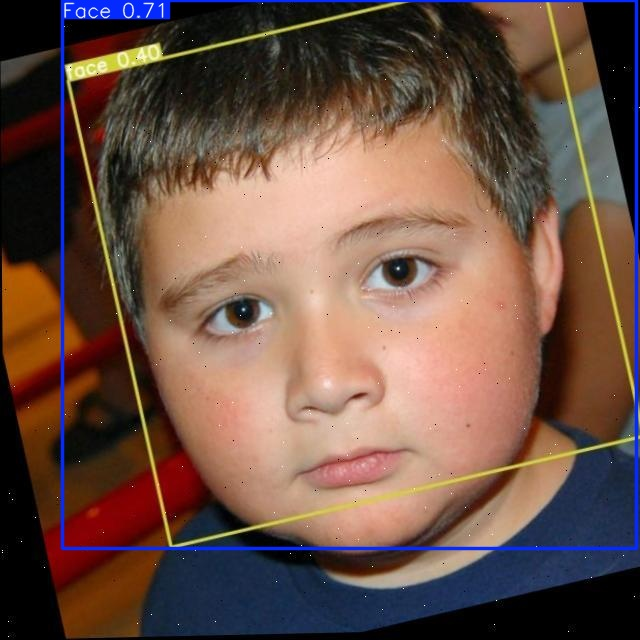

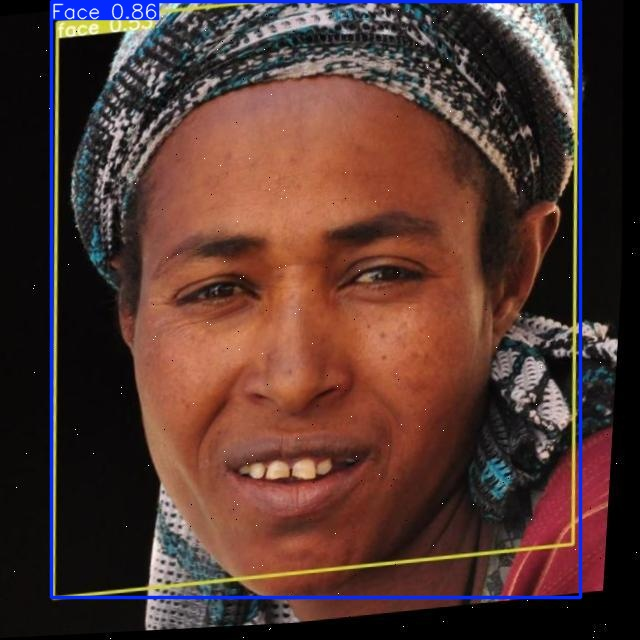

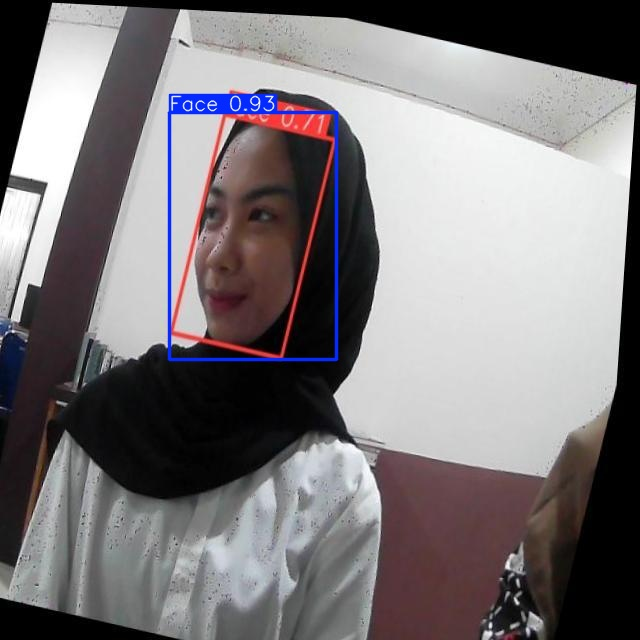

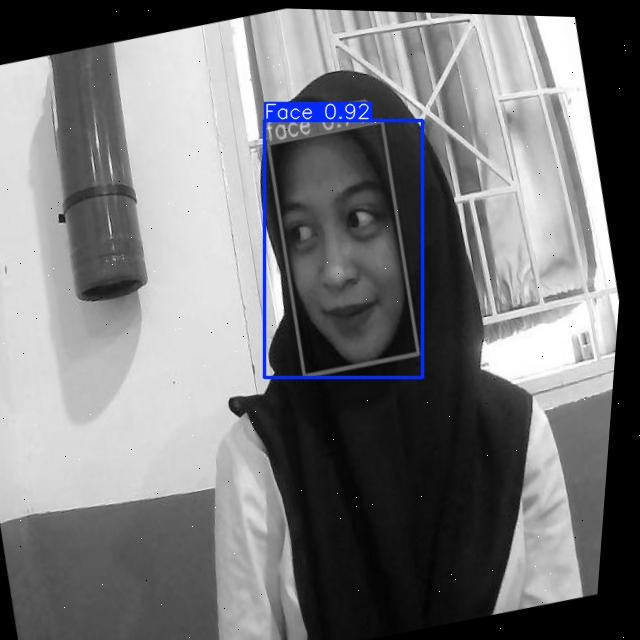

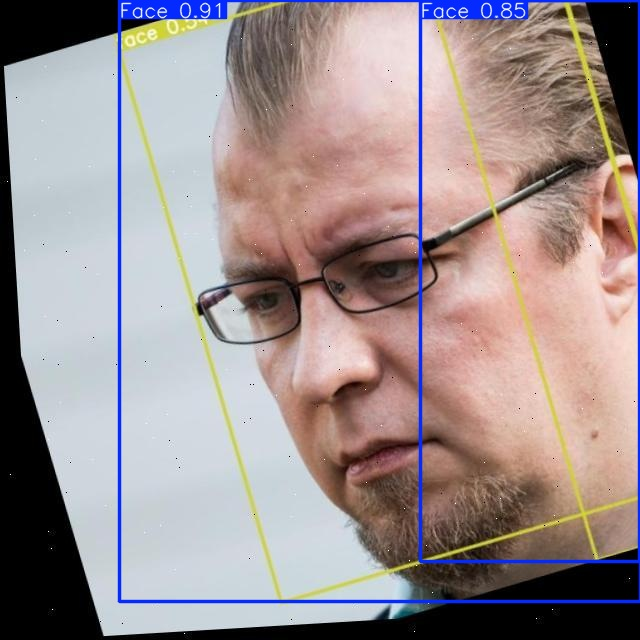

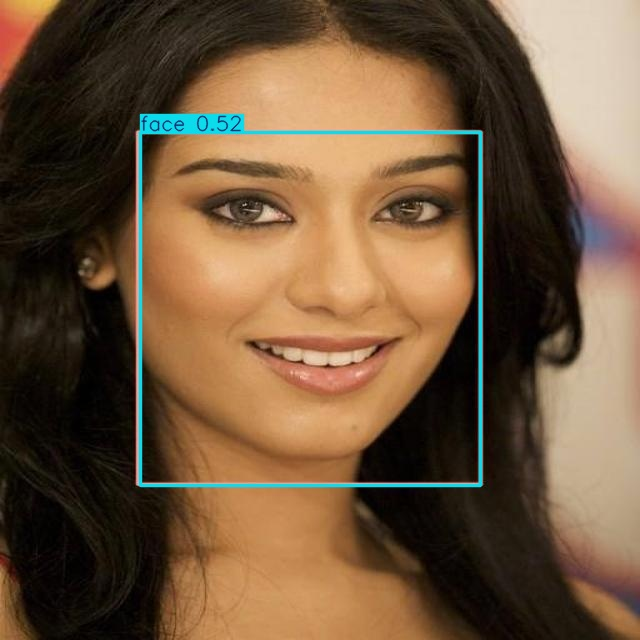

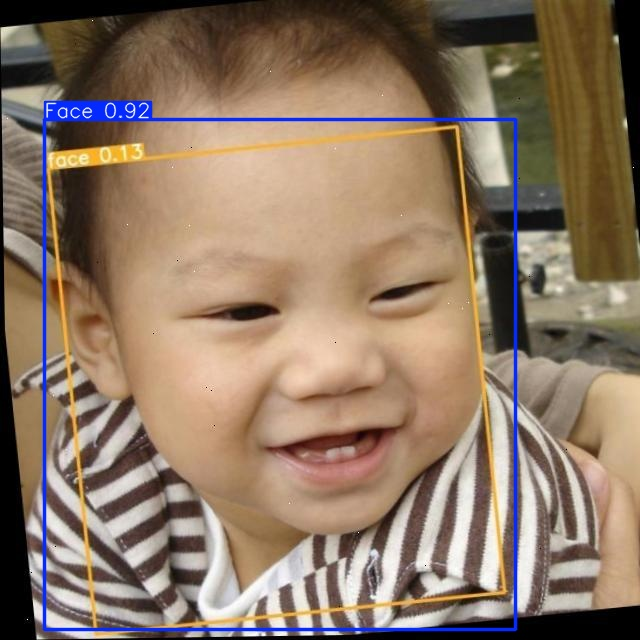

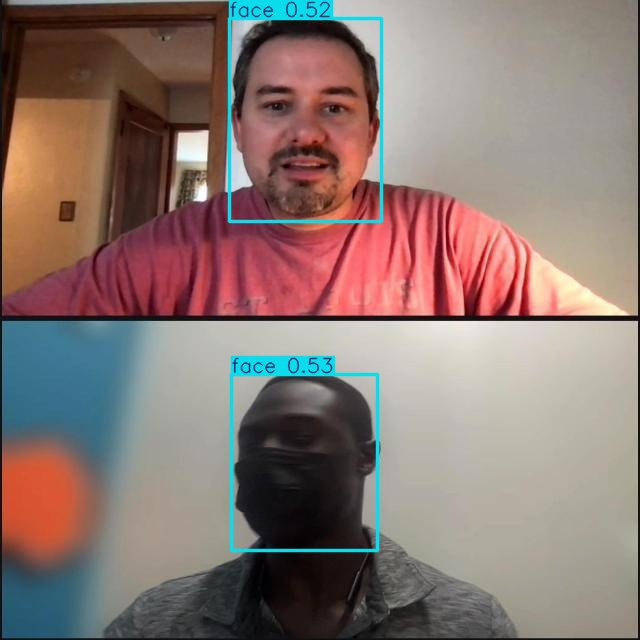

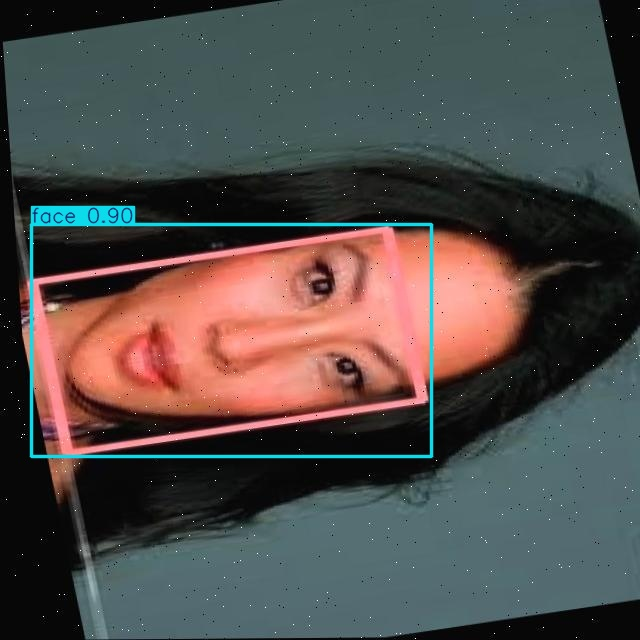

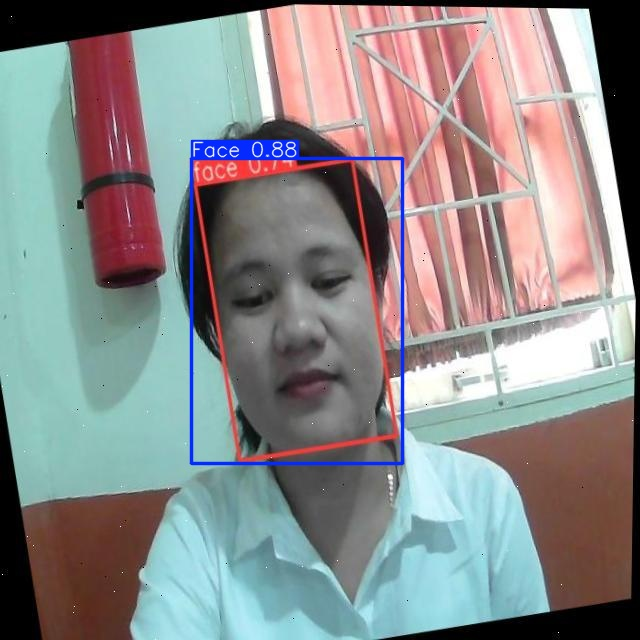

In [16]:
# Display inference on ALL test images
import glob
from IPython.display import Image, display
i = 0
for imageName in glob.glob("runs/detect/predict/*.jpg"): #assuming JPG
    if i %25 ==0 :
        print("\n")
        display(Image(filename=imageName))
    i = i +1